In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import davies_bouldin_score
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
customers = pd.read_csv('data\Customers.csv')
transactions = pd.read_csv('data\Transactions.csv')

In [3]:
customers.columns = customers.columns.str.strip().str.lower()
transactions.columns = transactions.columns.str.strip().str.lower()


In [4]:
merged_data = transactions.merge(customers, on='customerid')


In [5]:
segmentation_data = merged_data.groupby('customerid').agg({
    'totalvalue': 'sum',
    'quantity': 'sum'
}).reset_index()

In [6]:
region_dummies = pd.get_dummies(customers[['customerid', 'region']], columns=['region'], drop_first=True)
segmentation_data = segmentation_data.merge(region_dummies, on='customerid')


In [7]:
scaler = StandardScaler()
segmentation_data_scaled = scaler.fit_transform(segmentation_data.iloc[:, 1:])


In [8]:
n_clusters = 4  # You can adjust this based on your analysis
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
clusters = kmeans.fit_predict(segmentation_data_scaled)
segmentation_data['cluster'] = clusters

In [9]:
db_index = davies_bouldin_score(segmentation_data_scaled, clusters)
print(f'Davies-Bouldin Index: {db_index}')


Davies-Bouldin Index: 0.9475622901515466


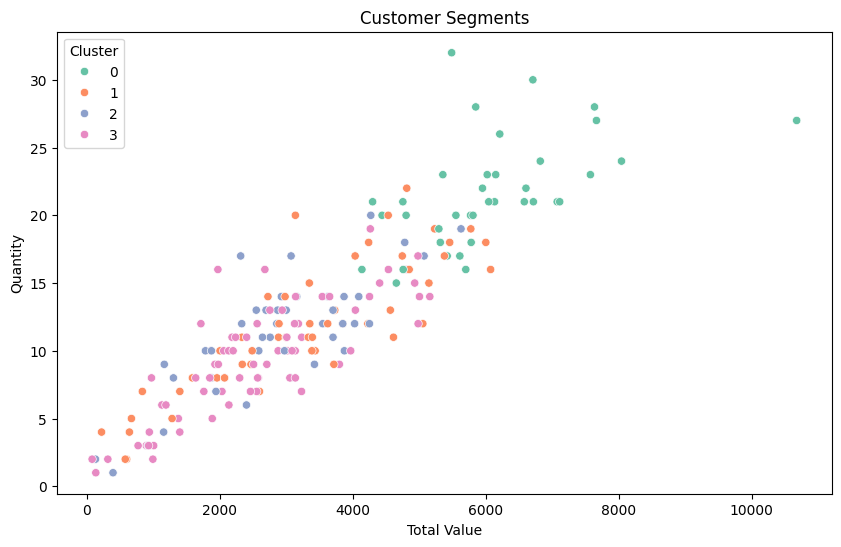

In [10]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=segmentation_data, x='totalvalue', y='quantity', hue='cluster', palette='Set2')
plt.title('Customer Segments')
plt.xlabel('Total Value')
plt.ylabel('Quantity')
plt.legend(title='Cluster')
plt.show()

C:\Users\anike\AppData\Local\Temp\ipykernel_10364\778358196.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=segmentation_data, x='cluster', y='totalvalue', palette='Set2')


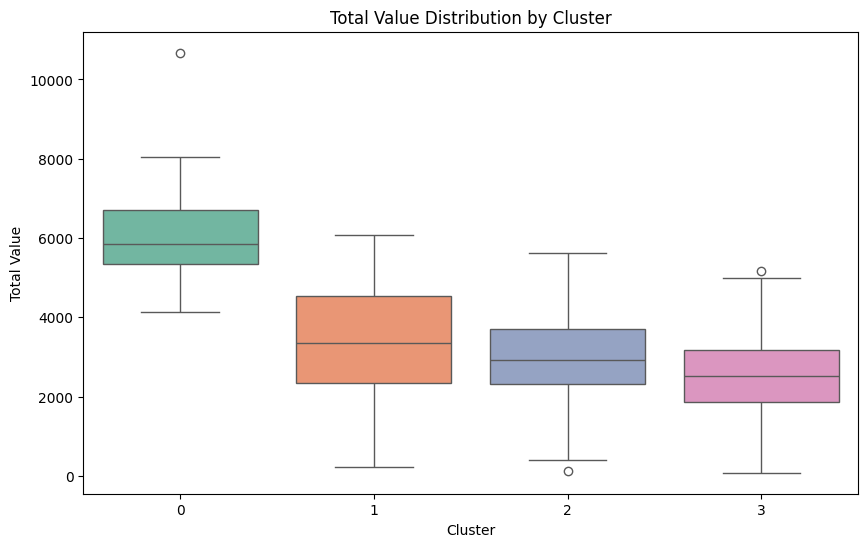

In [11]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=segmentation_data, x='cluster', y='totalvalue', palette='Set2')
plt.title('Total Value Distribution by Cluster')
plt.xlabel('Cluster')
plt.ylabel('Total Value')
plt.show()

In [12]:
segmentation_data.to_csv('Aniket_Vishwakarma_Clustering_Results.csv', index=False)


In [13]:
print(f'Number of Clusters: {n_clusters}')
print(f'Davies-Bouldin Index: {db_index}')
print("Clustering results saved to 'Clustering_Results.csv'.")


Number of Clusters: 4
Davies-Bouldin Index: 0.9475622901515466
Clustering results saved to 'Clustering_Results.csv'.
